In [2]:
from westpa.analysis import Run
run = Run.open('west.h5')
run


<WESTPA Run with 40 iterations at 0x1531fe55dac0>

In [ ]:
recycled_walkers = list(run.recycled_walkers)  
print(f"Recycled walkers: {len(recycled_walkers)}")
walkers_list = list(run.recycled_walkers)
print(walkers_list)


Recycled walkers: 58
[Walker(2, Iteration(6, <WESTPA Run with 40 iterations at 0x1531fe55dac0>)), Walker(2, Iteration(9, <WESTPA Run with 40 iterations at 0x1531fe55dac0>)), Walker(18, Iteration(9, <WESTPA Run with 40 iterations at 0x1531fe55dac0>)), Walker(1, Iteration(10, <WESTPA Run with 40 iterations at 0x1531fe55dac0>)), Walker(3, Iteration(11, <WESTPA Run with 40 iterations at 0x1531fe55dac0>)), Walker(6, Iteration(11, <WESTPA Run with 40 iterations at 0x1531fe55dac0>)), Walker(6, Iteration(12, <WESTPA Run with 40 iterations at 0x1531fe55dac0>)), Walker(7, Iteration(12, <WESTPA Run with 40 iterations at 0x1531fe55dac0>)), Walker(0, Iteration(13, <WESTPA Run with 40 iterations at 0x1531fe55dac0>)), Walker(1, Iteration(14, <WESTPA Run with 40 iterations at 0x1531fe55dac0>)), Walker(3, Iteration(15, <WESTPA Run with 40 iterations at 0x1531fe55dac0>)), Walker(17, Iteration(16, <WESTPA Run with 40 iterations at 0x1531fe55dac0>)), Walker(3, Iteration(18, <WESTPA Run with 40 iterations 

In [5]:
iteration = run.iteration(1)
iteration.summary

n_particles              136
min_bin_prob        0.015625
max_bin_prob          0.4375
min_seg_prob        0.001953
max_seg_prob         0.09375
cputime         12622.080157
walltime         3428.212807
Name: 1, dtype: object

below is a quick way to check parent ID

if iteration = 1, the parent_id should be the basis state ID

In [6]:
iteration.segment_summaries

,weight,parent_id,wtg_n_parents,wtg_offset,cputime,walltime,endpoint_type,status
0,0.001953,-43,1,0,89.099778,93.592874,CONTINUES,COMPLETE
1,0.001953,-43,1,1,89.75057,103.185982,CONTINUES,COMPLETE
2,0.001953,-43,1,2,89.844961,93.931621,CONTINUES,COMPLETE
3,0.001953,-43,1,3,89.637523,93.350893,CONTINUES,COMPLETE
4,0.001953,-43,1,4,89.699782,105.942762,CONTINUES,COMPLETE
...,...,...,...,...,...,...,...,...
131,0.046875,-54,1,131,91.267619,94.010413,CONTINUES,COMPLETE
132,0.046875,-47,1,132,99.055336,103.919189,CONTINUES,COMPLETE
133,0.046875,-14,1,133,97.1216,100.122227,CONTINUES,COMPLETE
134,0.0625,-35,1,134,100.071303,104.320401,CONTINUES,COMPLETE


class Segment:
    '''A class wrapping segment data that must be passed through the work manager or data manager.
    Most fields are self-explanatory.  One item worth noting is that a negative parent ID means that
    the segment starts from the initial state with ID -(segment.parent_id+1)
    https://github.com/westpa/westpa/blob/b3afe209fcffc6238c1d2ec700059c7e30f2adca/src/westpa/core/segment.py#L28
    

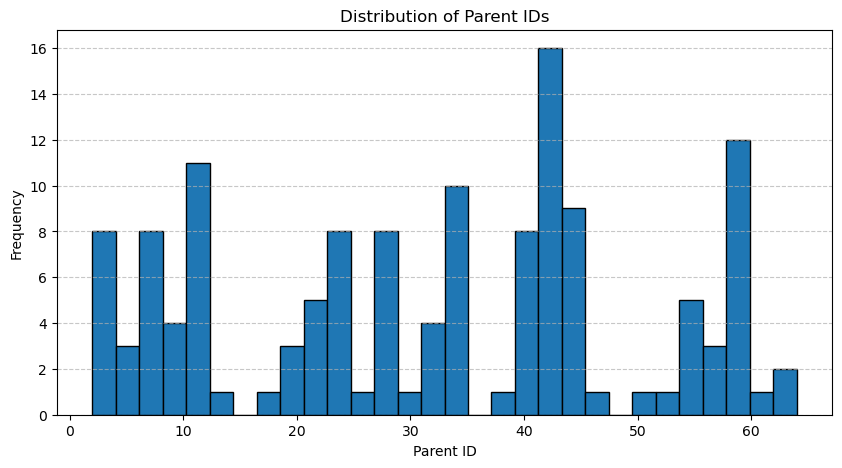

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = iteration.segment_summaries  

df['parent_id'] = df['parent_id'].abs()  


plt.figure(figsize=(10, 5))
plt.hist(df['parent_id'], bins=30, edgecolor='black')
plt.xlabel('Parent ID')
plt.ylabel('Frequency')
plt.title('Distribution of Parent IDs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



below is an easy way to remind you of the basis state information

In [10]:
iteration.basis_states


[<westpa.core.states.BasisState object at 0x1531f5f75160 state_id=0 label='0.rst' prob=0.015625 pcoord=array([88.0273, 68.9717], dtype=float32)>,
 <westpa.core.states.BasisState object at 0x1531f5f750d0 state_id=1 label='1.rst' prob=0.015625 pcoord=array([44.4645, 46.5801], dtype=float32)>,
 <westpa.core.states.BasisState object at 0x1531f5f751f0 state_id=2 label='2.rst' prob=0.015625 pcoord=array([47.605 , 43.9418], dtype=float32)>,
 <westpa.core.states.BasisState object at 0x1531f5f75100 state_id=3 label='3.rst' prob=0.015625 pcoord=array([55.5694, 55.6586], dtype=float32)>,
 <westpa.core.states.BasisState object at 0x1531f5f75130 state_id=4 label='4.rst' prob=0.015625 pcoord=array([51.7778, 50.4428], dtype=float32)>,
 <westpa.core.states.BasisState object at 0x1531f5f75190 state_id=5 label='5.rst' prob=0.015625 pcoord=array([60.4233, 59.8516], dtype=float32)>,
 <westpa.core.states.BasisState object at 0x1531f5f751c0 state_id=6 label='6.rst' prob=0.015625 pcoord=array([36.8846, 39.45

In [19]:
run.close()

select all the basis states information above and save it as a txt manually

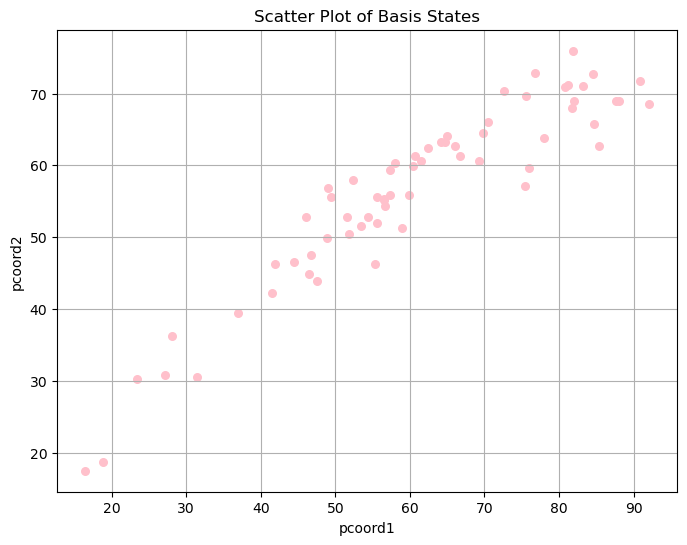

In [ ]:
### plot the basis state in scatter plots based on their pcoords ###

import re
import numpy as np
import matplotlib.pyplot as plt


input_file = "/home/fuyao/WESTPA_NEW_analysis/E166V_ACCESS_40/basis_state.txt"   # change it with your path
output_file = "extracted_basis_states.txt"

pattern = re.compile(r"state_id=(\d+).*?pcoord=array\(\[(.*?), (.*?)\]", re.DOTALL)


state_ids = []
pcoord1 = []
pcoord2 = []


with open(input_file, "r") as f:
    content = f.read()
    matches = pattern.findall(content)

    with open(output_file, "w") as out_f:
        for match in matches:
            state_id = int(match[0])
            coord1 = float(match[1])
            coord2 = float(match[2])

            state_ids.append(state_id)
            pcoord1.append(coord1)
            pcoord2.append(coord2)

            out_f.write(f"state_id={state_id}  pcoord=array([{coord1}, {coord2}])\n")

plt.figure(figsize=(8, 6))
plt.scatter(pcoord1, pcoord2, s=30, c='pink', marker='o', edgecolors='pink')

# for i, state_id in enumerate(state_ids):
#     plt.text(pcoord1[i], pcoord2[i], str(state_id), fontsize=8, ha='right', va='bottom')

plt.xlabel("pcoord1")
plt.ylabel("pcoord2")
plt.title("Scatter Plot of Basis States")
plt.grid(True)
plt.show()

In [ ]:
!pip install adjustText

bin0: [22, 42]
bin1: [6, 26, 33, 39, 41]
bin2: [1, 2, 4, 10, 11, 19, 21, 24, 29, 31, 50, 54, 57, 58, 59, 63]
bin3: [3, 5, 7, 8, 12, 14, 16, 18, 27, 32, 35, 36, 37, 40, 44, 45, 46, 51, 52, 55, 60]
bin4: [0, 9, 13, 15, 17, 20, 23, 25, 28, 30, 34, 38, 43, 47, 48, 49, 53, 56, 61, 62]


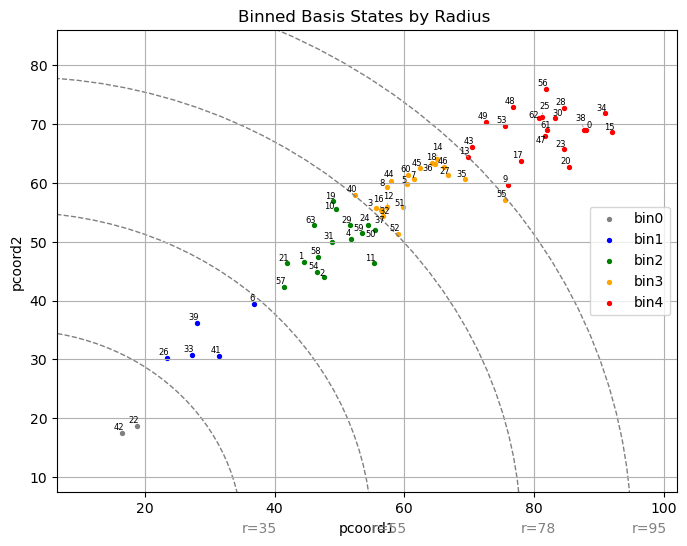

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt

input_file = "/home/fuyao/WESTPA_NEW_analysis/E166V_ACCESS_40/extracted_basis_states.txt"

pattern = re.compile(r"state_id=(\d+).*?pcoord=array\(\[(.*?), (.*?)\]", re.DOTALL)

state_ids = []
pcoord1_list = []
pcoord2_list = []

with open(input_file, "r") as f:
    content = f.read()
    matches = pattern.findall(content)

    for match in matches:
        state_id = int(match[0])
        pcoord1 = float(match[1])
        pcoord2 = float(match[2])

        state_ids.append(state_id)
        pcoord1_list.append(pcoord1)
        pcoord2_list.append(pcoord2)

pcoord1_array = np.array(pcoord1_list)
pcoord2_array = np.array(pcoord2_list)

# Calculate the Euclidean distance (radius) of each point
radius_array = np.sqrt(pcoord1_array**2 + pcoord2_array**2)

# set up the bins. 
# By adjusting the radius, different states can be separated into distinct bins.
bins = {
    "bin0": [],  # r < 30
    "bin1": [],  # 30 <r < 55
    "bin2": [],  # 55 <= r < 78
    "bin3": [],  # 78 <= r < 95
    "bin4": [],  # 95 <= r
}

for i, state_id in enumerate(state_ids):
    r = radius_array[i]
    if r < 30:
        bins["bin0"].append(state_id)
    elif 30 <= r < 55:
        bins["bin1"].append(state_id)
    elif 55 <= r < 78:
        bins["bin2"].append(state_id)
    elif 78 <= r < 95:
        bins["bin3"].append(state_id)
    else:
        bins["bin4"].append(state_id)  

## print
for bin_name, state_list in bins.items():
    print(f"{bin_name}: {state_list}")

##plot
plt.figure(figsize=(8, 6))

colors = ["gray", "blue", "green", "orange", "red"]
bin_names = ["bin0", "bin1", "bin2", "bin3", "bin4"]


for i, bin_name in enumerate(bin_names):
    indices = [state_ids.index(sid) for sid in bins[bin_name]]
    plt.scatter(pcoord1_array[indices], pcoord2_array[indices], c=colors[i], 
            label=bin_name, s=8, )

from adjustText import adjust_text

texts = []
for i, state_id in enumerate(state_ids):
    texts.append(plt.text(pcoord1_array[i], pcoord2_array[i], str(state_id), fontsize=6, ha='right', va='bottom'))

# adjust labels to avoid overlapping
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))


circle_radii = [35, 55, 78, 95]
for r in circle_radii:
    circle = plt.Circle((0, 0), r, color="gray", fill=False, linestyle="--", linewidth=1)
    plt.gca().add_patch(circle)
    plt.text(r, 0, f"r={r}", color="gray", fontsize=10, verticalalignment="bottom")


plt.xlim(min(pcoord1_array) - 10, max(pcoord1_array) + 10)
plt.ylim(min(pcoord2_array) - 10, max(pcoord2_array) + 10)

plt.xlabel("pcoord1")
plt.ylabel("pcoord2")
plt.title("Binned Basis States by Radius ")
plt.legend()
plt.grid(True)
plt.show()

# in this case
# bin0: 2 basis states
# bin1: 5 
# bin2: 16 
# bin3: 21 
# bin4: 20 

# maybe you wanna adjust the number of basis states to make it could share the weights evenly and at same time their weight could sum up to 1

# not sure if WESTPA could automatically adjust the weights so that their total still sums exactly to 1, even if individual weights are repeating decimals.